<a href="https://colab.research.google.com/github/Manjiri1101/CMPE255-Manjiri/blob/main/Assignment4/Assignment4_clustering_techniques_Manjiri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment : Use various clustering techniques in colab 

## CMPE 255: Data Mining
## Name: Manjiri Kadam ⚛
## Student ID : 015312076 ☕

# Objective▶

##Implement various clustering algorithms in colabs

 
### submit one colab per assignment - provide complete colab with proper documentation etc.,. 

 

1.  K-Means clustering from scratch

hint : https://colab.sandbox.google.com/github/SANTOSHMAHER/Machine-Learning-Algorithams/blob/master/K_Means_algorithm_using_Python_from_scratch_.ipynb 
or https://colab.sandbox.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.11-K-Means.ipynb 
another interesting supervised kmeans colab if people like to do : https://developers.google.com/machine-learning/clustering/programming-exercise 

https://colab.sandbox.google.com/github/google/eng-edu/blob/main/ml/clustering/clustering-supervised-similarity.ipynb?utm_source=ss-clustering&utm_campaign=colab-external&utm_medium=referral&utm_content=clustering-supervised-similarity#scrollTo=eExms-TP8Hn6 
 

2.  Hierarchical clustering (not from scratch)

hint : https://colab.sandbox.google.com/github/saskeli/data-analysis-with-python-summer-2019/blob/master/clustering.ipynb 

3.  Gaussian mixture models clustering (not from scratch)

 

hint : https://colab.sandbox.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.12-Gaussian-Mixtures.ipynb 

 

4. DB Scan clustering (not from scratch) using pycaret library 

Hint: https://pycaret.org/create-model/

https://towardsdatascience.com/clustering-made-easy-with-pycaret-656316c0b080 (Links to an external site.)

http://www.pycaret.org/tutorials/html/CLU101.html

Please ensure you provide proper measures of clustering quality as well. See attached colabs for examples.

use colabs as inspuiration.

 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Part 1: K-means Clustering From scratch

In [ ]:
import numpy as np
import random
import cv2
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import random
import pandas as pd
import seaborn as sns

from sklearn.cluster import AgglomerativeClustering 
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

from sklearn.mixture import GaussianMixture # For gaussian clustering

In [ ]:
random.seed(7)
np.random.seed(7)

In [ ]:
def get_initial_centroids(X, k):

    number_of_samples = X.shape[0]
    sample_points_ids = random.sample(range(0, number_of_samples), k)

    centroids = [tuple(X[id]) for id in sample_points_ids]
    unique_centroids = list(set(centroids))

    number_of_unique_centroids = len(unique_centroids)

    while number_of_unique_centroids < k:
        new_sample_points_ids = random.sample(range(0, number_of_samples), k - number_of_unique_centroids)
        new_centroids = [tuple(X[id]) for id in new_sample_points_ids]
        unique_centroids = list(set(unique_centroids + new_centroids))

        number_of_unique_centroids = len(unique_centroids)

    return np.array(unique_centroids)

In [ ]:
def get_euclidean_distance(A_matrix, B_matrix):


    A_square = np.reshape(np.sum(A_matrix * A_matrix, axis=1), (A_matrix.shape[0], 1))
    B_square = np.reshape(np.sum(B_matrix * B_matrix, axis=1), (1, B_matrix.shape[0]))
    AB = A_matrix @ B_matrix.T

    C = -2 * AB + B_square + A_square

    return np.sqrt(C)

In [ ]:
def get_clusters(X, centroids, distance_mesuring_method):

    k = centroids.shape[0]

    clusters = {}

    distance_matrix = distance_mesuring_method(X, centroids)

    closest_cluster_ids = np.argmin(distance_matrix, axis=1)

    for i in range(k):
        clusters[i] = []

    for i, cluster_id in enumerate(closest_cluster_ids):
        clusters[cluster_id].append(X[i])

    return clusters

In [ ]:
def has_centroids_covered(previous_centroids, new_centroids, distance_mesuring_method, movement_threshold_delta):

    distances_between_old_and_new_centroids = distance_mesuring_method(previous_centroids, new_centroids)
    centroids_covered = np.max(distances_between_old_and_new_centroids.diagonal()) <= movement_threshold_delta

    return centroids_covered

In [ ]:
def perform_k_means_algorithm(X, k, distance_mesuring_method, movement_threshold_delta=0):

    new_centroids = get_initial_centroids(X=X, k=k)

    centroids_covered = False

    while not centroids_covered:
        previous_centroids = new_centroids
        clusters = get_clusters(X, previous_centroids, distance_mesuring_method)

        new_centroids = np.array([np.mean(clusters[key], axis=0, dtype=X.dtype) for key in sorted(clusters.keys())])

        centroids_covered = has_centroids_covered(previous_centroids, new_centroids, distance_mesuring_method, movement_threshold_delta)

    return new_centroids

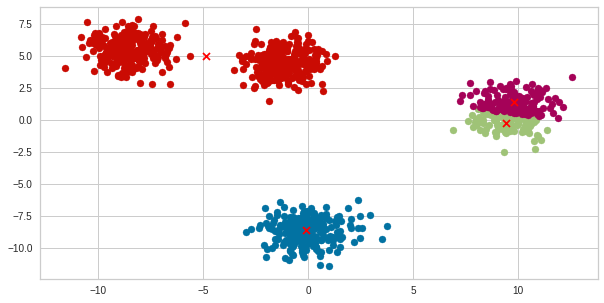

In [ ]:
k = 4

X, _ = make_blobs(n_samples=1000, n_features=2, centers=k)

centroids = perform_k_means_algorithm(X, k, movement_threshold_delta=1/10, distance_mesuring_method=get_euclidean_distance)

clusters = get_clusters(X, centroids, get_euclidean_distance)

plt.rcParams['figure.figsize'] = [10, 5]
for centroid, points in clusters.items():
    points = np.array(points)
    centroid = np.mean(points, axis=0)


    plt.scatter(points[:, 0], points[:, 1], marker='o')
    plt.grid()
    plt.scatter(centroid[0], centroid[1], marker='x', color="red")

plt.show()

In [ ]:
def get_reduced_colors_image(image, number_of_colors):
    h, w, d = image.shape

    X = np.reshape(image, (h * w, d))
    X = np.array(X, dtype=np.int32)

    centroids = perform_k_means_algorithm(X, k=number_of_colors, distance_mesuring_method=get_euclidean_distance)
    distance_matrix = get_euclidean_distance(X, centroids)
    closest_cluster_ids = np.argmin(distance_matrix, axis=1)

    X_reconstructed = centroids[closest_cluster_ids]
    X_reconstructed = np.array(X_reconstructed, dtype=np.uint8)
    reduced_image = np.reshape(X_reconstructed, (h, w, d))

    return reduced_image

## Using K-means clustering on image with different k values

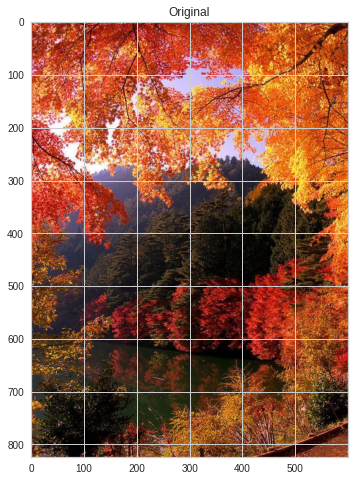

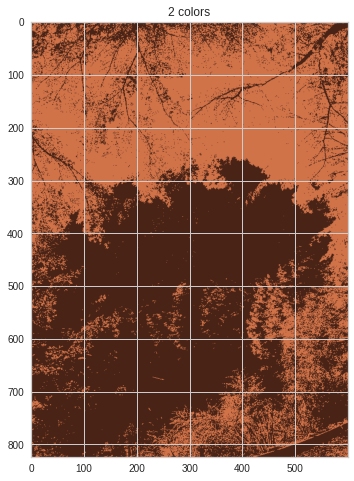

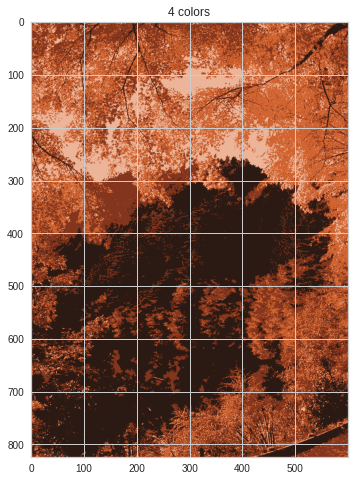

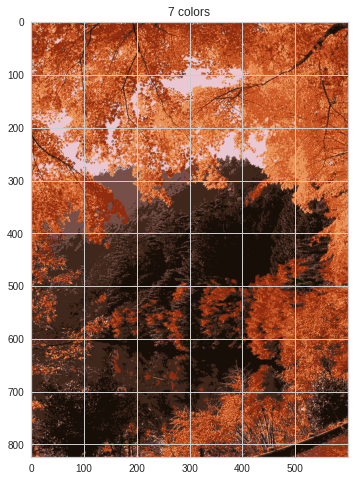

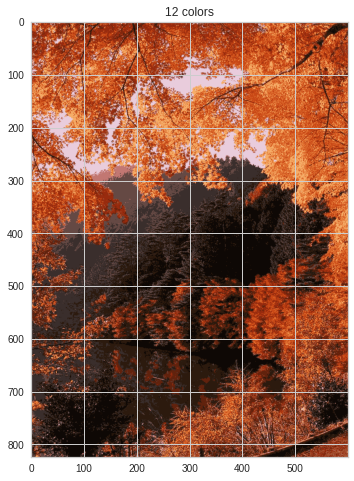

In [ ]:
k_values = [2, 4, 7, 12]
            #  5, 6, 7, 8, 9, 10, 16, 32, 64]

reconstrutons = []

img = cv2.imread("/content/drive/MyDrive/Data_Mining/image.jfif")
plt.rcParams['figure.figsize'] = [15, 8]
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original")
plt.show()

for k in k_values:
    reduced_colors_image = get_reduced_colors_image(img, k)
    plt.title(f"{k} colors")
    plt.imshow(cv2.cvtColor(reduced_colors_image, cv2.COLOR_BGR2RGB))
    plt.show()
    reconstrutons.append(reduced_colors_image)


# Part 2: Hierarchical clustering 

In [ ]:
X,y = make_blobs(centers=4, n_samples=200, random_state=0, cluster_std=0.7)
print(X[:10],y[:10])

[[ 2.26403424  1.82613379]
 [-0.97647444  2.59138889]
 [ 1.10046838  4.02254067]
 [-2.82715074  7.11970523]
 [ 1.53393915  0.31915668]
 [ 0.98362009  5.55389667]
 [-1.74452433  2.98606238]
 [ 0.35482006  2.9172298 ]
 [ 1.83747356  5.14545322]
 [ 1.48663347  4.39407536]] [1 2 0 3 1 0 2 0 0 0]


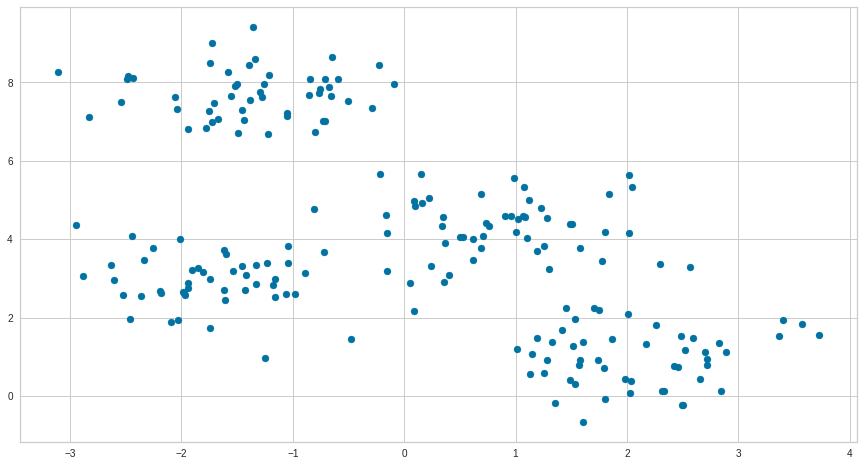

In [ ]:
plt.scatter(X[:,0],X[:,1]);

In [ ]:
#Read the dataset as a dataframe:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/database.csv')
#Displaying the data:
df.head(5)

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


Cleaning the data to apply the clustering methods

In [ ]:
# Finding the missing value,null values for each column
print('Missing values\n',df.isnull().sum().sort_values(ascending=False)[:10])

Missing values
 Magnitude Error               23085
Horizontal Error              22256
Horizontal Distance           21808
Magnitude Seismic Stations    20848
Depth Error                   18951
Depth Seismic Stations        16315
Azimuthal Gap                 16113
Root Mean Square               6060
Magnitude Type                    3
Time                              0
dtype: int64


In [ ]:
#dropping some columns
df.drop(['Depth Error','Depth Seismic Stations','Magnitude Error','Magnitude Seismic Stations','Azimuthal Gap','Horizontal Distance','Horizontal Error'], axis = 1, inplace = True)
#Displays the dataframe after dropping the columns
df.head(10)

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,6.0,MW,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,5.8,MW,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,6.2,MW,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,5.8,MW,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,5.8,MW,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic
5,01/10/1965,13:36:32,-13.405,166.629,Earthquake,35.0,6.7,MW,NaN,ISCGEM860922,ISCGEM,ISCGEM,ISCGEM,Automatic
6,01/12/1965,13:32:25,27.357,87.867,Earthquake,20.0,5.9,MW,NaN,ISCGEM861007,ISCGEM,ISCGEM,ISCGEM,Automatic
7,01/15/1965,23:17:42,-13.309,166.212,Earthquake,35.0,6.0,MW,NaN,ISCGEM861111,ISCGEM,ISCGEM,ISCGEM,Automatic
8,01/16/1965,11:32:37,-56.452,-27.043,Earthquake,95.0,6.0,MW,NaN,ISCGEMSUP861125,ISCGEMSUP,ISCGEM,ISCGEM,Automatic
9,01/17/1965,10:43:17,-24.563,178.487,Earthquake,565.0,5.8,MW,NaN,ISCGEM861148,ISCGEM,ISCGEM,ISCGEM,Automatic


In [ ]:
# As magnitude type column has only 3 null values, looing for the indexes for the NaN value
df['Magnitude Type'].loc[df['Magnitude Type'].isnull()]

6703    NaN
7294    NaN
7919    NaN
Name: Magnitude Type, dtype: object

In [ ]:
# Dropping the column with above index values
df = df.drop(df.index[[6703,7294,7919]])

In [ ]:
#Filling missing RMS values with mean
df['Root Mean Square'] = df['Root Mean Square'].fillna(1.022)
df.sample(3)

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
2127,10/20/1971,08:40:21,21.967,121.388,Earthquake,43.8,5.8,MW,1.022,ISCGEM779458,ISCGEM,ISCGEM,ISCGEM,Automatic
8740,11/06/1987,18:47:35,-22.801,-63.583,Earthquake,538.1,6.0,MW,0.900,USP00039XN,US,US,NC,Reviewed
217,08/11/1965,03:40:58,-15.449,166.980,Earthquake,25.0,7.2,MW,1.022,ISCGEM854451,ISCGEM,ISCGEM,ISCGEM,Automatic


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23409 entries, 0 to 23411
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              23409 non-null  object 
 1   Time              23409 non-null  object 
 2   Latitude          23409 non-null  float64
 3   Longitude         23409 non-null  float64
 4   Type              23409 non-null  object 
 5   Depth             23409 non-null  float64
 6   Magnitude         23409 non-null  float64
 7   Magnitude Type    23409 non-null  object 
 8   Root Mean Square  23409 non-null  float64
 9   ID                23409 non-null  object 
 10  Source            23409 non-null  object 
 11  Location Source   23409 non-null  object 
 12  Magnitude Source  23409 non-null  object 
 13  Status            23409 non-null  object 
dtypes: float64(5), object(9)
memory usage: 2.7+ MB


In [ ]:
# Dropping some rows to increase the performance

In [ ]:
X=df[['Magnitude','Depth']]

In [ ]:
X = X.head(500)

In [ ]:
# Standardize data
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(X) 
  
# Normalizing the Data 
normalized_df = normalize(scaled_df) 
  
# Converting the numpy array into a pandas DataFrame 
normalized_df = pd.DataFrame(normalized_df) 
  
# Reducing the dimensions of the data 
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(normalized_df) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
  
X_principal.head(2)

,P1,P2
0,0.224767,1.295865
1,-0.728240,0.608746


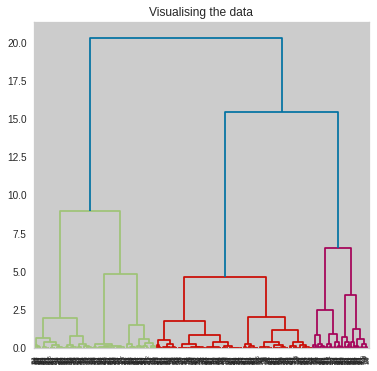

In [ ]:
plt.figure(figsize =(6, 6)) 
plt.title('Visualising the data') 
Dendrogram = shc.dendrogram((shc.linkage(X_principal, method ='ward')))
#
#https://www.kaggle.com/vipulgandhi/hierarchical-clustering-explanation

# Part 3: Gaussian mixture models clustering 

In [ ]:
#Applying Gaussian Mixture model
gm = GaussianMixture(n_components=4, random_state=123, n_init=10)
preds = gm.fit_predict(X)

In [ ]:
X['label']= preds

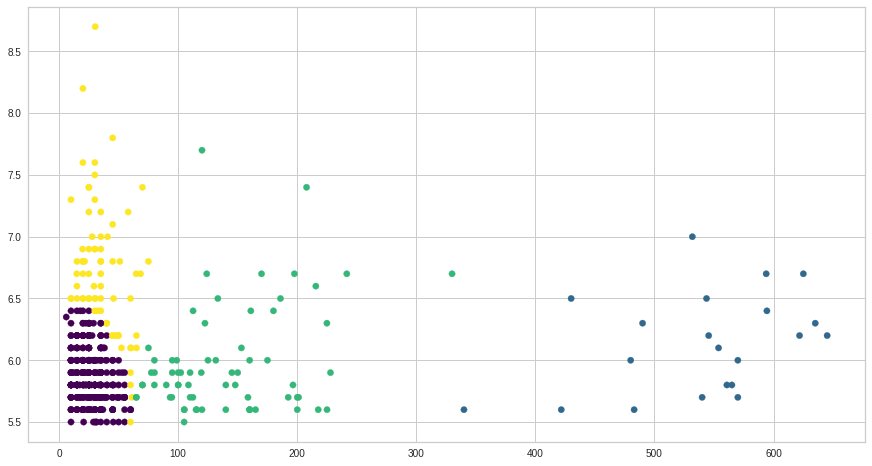

In [ ]:
plt.scatter(X['Depth'],X['Magnitude'] ,c=X['label'], s=40, cmap='viridis');

In [ ]:
#https://www.analyticsvidhya.com/blog/2019/10/gaussian-mixture-models-clustering/

# Part 4: DB Scan clustering using pycaret library 

In [ ]:
# Installing pycaret
!pip install pycaret

In [ ]:
!pip install pyyaml==5.4.1

In [ ]:
#https://stackoverflow.com/questions/69564817/typeerror-load-missing-1-required-positional-argument-loader-in-google-col
from pycaret.clustering import *

In [ ]:
#Initializing the PyCaret Environment
cluster = setup(X, session_id = 7652)

,Description,Value
0,session_id,7652
1,Original Data,"(500, 3)"
2,Missing Values,False
3,Numeric Features,2
4,Categorical Features,1
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(500, 6)"
9,CPU Jobs,-1


In [ ]:
# Applying DBScan using pycarat - Density-Based Spatial Clustering	‘dbscan’

dbs = create_model('dbscan')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3347,8.7639,1.1627,0,0,0


In [ ]:
# Plotting the db scan model
plot_model(dbs, 'cluster')

In [ ]:
#Saving the model
save_model(dbs, 'clustering_model')
results = assign_model(dbs)
results.head(10)

Transformation Pipeline and Model Successfully Saved


,Magnitude,Depth,label,Cluster
0,6.0,131.6,2,Cluster -1
1,5.8,80.0,2,Cluster -1
2,6.2,20.0,0,Cluster 0
3,5.8,15.0,0,Cluster 1
4,5.8,15.0,0,Cluster 1
5,6.7,35.0,3,Cluster 2
6,5.9,20.0,0,Cluster 0
7,6.0,35.0,0,Cluster 3
8,6.0,95.0,2,Cluster -1
9,5.8,565.0,1,Cluster -1


Thank you